<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_LIM_ESAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [3]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.3773632049560547

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 7
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,461
BRK,163
SAP,134
SAPX,46
SAPB,31
LIMX,12
LIMB,8



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [97]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: LIM
Masukkan Material yang ingin difilter: ESAP

Filtered rows: 62


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
5,CS8170210,BATU BERANI,Belambus_Selatan,3.6,4.3,0.7,0.85,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422
26,CS8170214,BATU BERANI,Belambus_Selatan,4.7,5.0,0.3,0.66,2.121,24.000,1.612,ESAP,None,LIM,LIM,3.664330,2.784891
27,CS8170214,BATU BERANI,Belambus_Selatan,5.0,6.0,1.0,1.00,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853
28,CS8170214,BATU BERANI,Belambus_Selatan,6.0,6.6,0.6,1.20,3.944,26.648,2.893,ESAP,None,LIM,LIM,1.873614,1.374332
29,CS8170214,BATU BERANI,Belambus_Selatan,6.6,7.0,0.4,1.20,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,CS8230887,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.0,3.6,0.6,1.00,2.305,15.401,1.950,ESAP,LIM,LIM,LIM,1.309702,1.107991
760,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.5,5.0,0.5,1.00,2.970,13.973,2.555,ESAP,Lim,LIM,LIM,2.025067,1.742103
761,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.0,6.0,1.0,1.00,6.260,17.572,5.160,ESAP,Sap,LIM,LIM,2.134161,1.759149
762,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,7.0,1.0,1.00,5.890,15.789,4.960,ESAP,Sap,LIM,LIM,2.008021,1.690965


# Filter By Interval

Descriptive statistics for Interval:
Count: 62
Mean: 0.616452
Standard Error: 0.034745
Median: 0.585
Mode: 1.0
Standard Deviation: 0.273580
Sample Variance: 0.074846
Kurtosis: -1.275574
Skewness: 0.251962
Range: 0.85
Minimum: 0.15
Maximum: 1.0
Sum: 38.22
Confidence Level (95%): ±0.069476

Bin calculation:
Freedman–Diaconis -> bins: 5, bin width: 0.290559
Sturges -> bins: 7, bin width: 0.121429


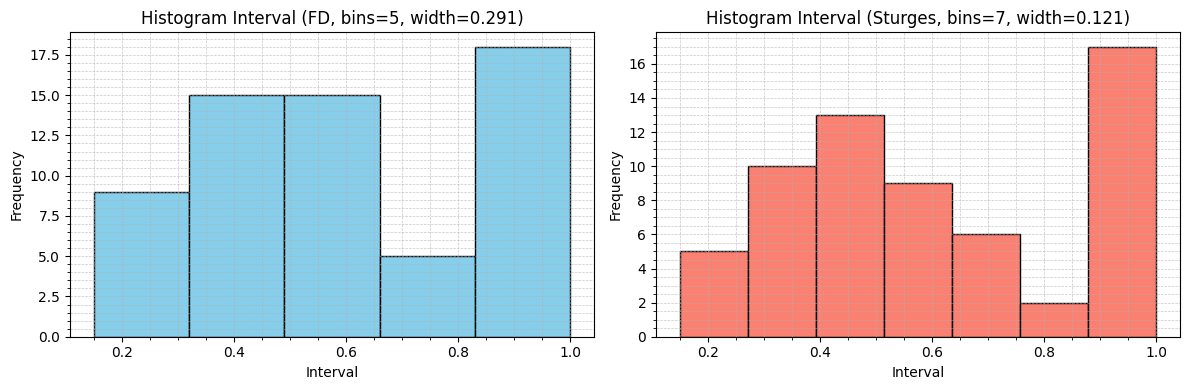


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.15,0.32,9
1,0.32,0.49,15
2,0.49,0.66,15
3,0.66,0.83,5
4,0.83,1.00,18



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.150000,0.271429,5
1,0.271429,0.392857,10
2,0.392857,0.514286,13
3,0.514286,0.635714,9
4,0.635714,0.757143,6
5,0.757143,0.878571,2
6,0.878571,1.000000,17


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [99]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.271429
Masukkan batas atas (is less than or equal to): 1.000000

Filtered rows: 57


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.850,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422
26,CS8170214,BATU BERANI,Belambus_Selatan,4.70,5.00,0.30,0.660,2.121,24.000,1.612,ESAP,None,LIM,LIM,3.664330,2.784891
27,CS8170214,BATU BERANI,Belambus_Selatan,5.00,6.00,1.00,1.000,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853
28,CS8170214,BATU BERANI,Belambus_Selatan,6.00,6.60,0.60,1.200,3.944,26.648,2.893,ESAP,None,LIM,LIM,1.873614,1.374332
29,CS8170214,BATU BERANI,Belambus_Selatan,6.60,7.00,0.40,1.200,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.350,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137
44,CS8170215,BATU BERANI,Belambus_Selatan,4.65,5.25,0.60,1.000,3.666,40.371,2.186,ESAP,None,LIM,LIM,2.089859,1.246162
88,CS8170220,BATU BERANI,Belambus_Selatan,8.00,8.50,0.50,1.600,4.728,27.030,3.450,ESAP,None,LIM,LIM,2.021451,1.475043
89,CS8170220,BATU BERANI,Belambus_Selatan,8.50,9.00,0.50,1.600,3.826,28.751,2.726,ESAP,None,LIM,LIM,1.635802,1.165498
90,CS8170220,BATU BERANI,Belambus_Selatan,9.00,9.53,0.53,1.600,4.081,31.855,2.781,ESAP,None,LIM,LIM,1.646063,1.121711


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 57
Mean: 1.090088
Standard Error: 0.046063
Median: 1.0
Mode: 1.0
Standard Deviation: 0.347772
Sample Variance: 0.120945
Kurtosis: 17.865192
Skewness: 3.619176
Range: 2.475
Minimum: 0.625
Maximum: 3.1
Sum: 62.135
Confidence Level (95%): ±0.092276

Bin calculation:
Freedman–Diaconis -> bins=7, width=N/A
Sturges -> bins=7, width=0.353571


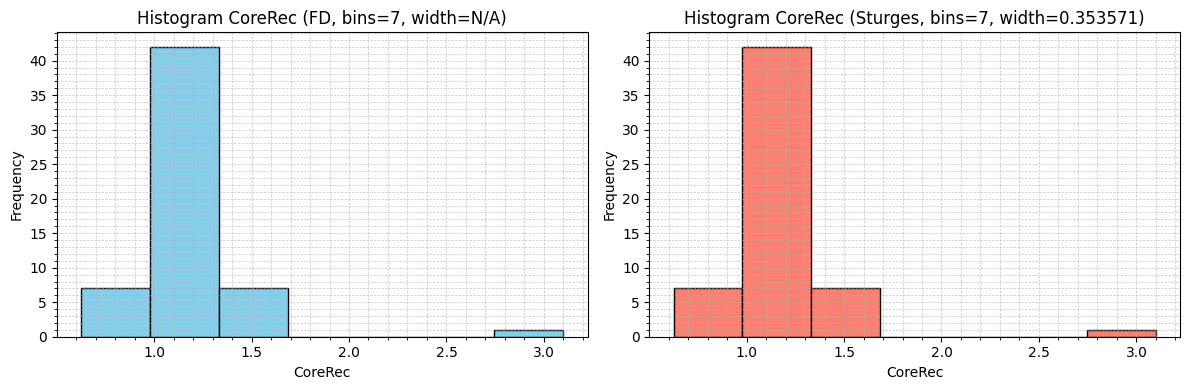


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.625000,0.978571,7
1,0.978571,1.332143,42
2,1.332143,1.685714,7
3,1.685714,2.039286,0
4,2.039286,2.392857,0
5,2.392857,2.746429,0
6,2.746429,3.100000,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.625000,0.978571,7
1,0.978571,1.332143,42
2,1.332143,1.685714,7
3,1.685714,2.039286,0
4,2.039286,2.392857,0
5,2.392857,2.746429,0
6,2.746429,3.100000,1


In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [101]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.625000
Masukkan batas atas (is less than or equal to): 1.685714

Filtered rows: 56


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.850,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422
26,CS8170214,BATU BERANI,Belambus_Selatan,4.70,5.00,0.30,0.660,2.121,24.000,1.612,ESAP,None,LIM,LIM,3.664330,2.784891
27,CS8170214,BATU BERANI,Belambus_Selatan,5.00,6.00,1.00,1.000,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853
28,CS8170214,BATU BERANI,Belambus_Selatan,6.00,6.60,0.60,1.200,3.944,26.648,2.893,ESAP,None,LIM,LIM,1.873614,1.374332
29,CS8170214,BATU BERANI,Belambus_Selatan,6.60,7.00,0.40,1.200,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.350,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137
44,CS8170215,BATU BERANI,Belambus_Selatan,4.65,5.25,0.60,1.000,3.666,40.371,2.186,ESAP,None,LIM,LIM,2.089859,1.246162
88,CS8170220,BATU BERANI,Belambus_Selatan,8.00,8.50,0.50,1.600,4.728,27.030,3.450,ESAP,None,LIM,LIM,2.021451,1.475043
89,CS8170220,BATU BERANI,Belambus_Selatan,8.50,9.00,0.50,1.600,3.826,28.751,2.726,ESAP,None,LIM,LIM,1.635802,1.165498
90,CS8170220,BATU BERANI,Belambus_Selatan,9.00,9.53,0.53,1.600,4.081,31.855,2.781,ESAP,None,LIM,LIM,1.646063,1.121711


# Filter By Wet Weight


Residual IQR acuan:
Q1: -0.600, Q3: -0.260, IQR: 0.340
Lower margin: -1.110, Upper margin: 0.250


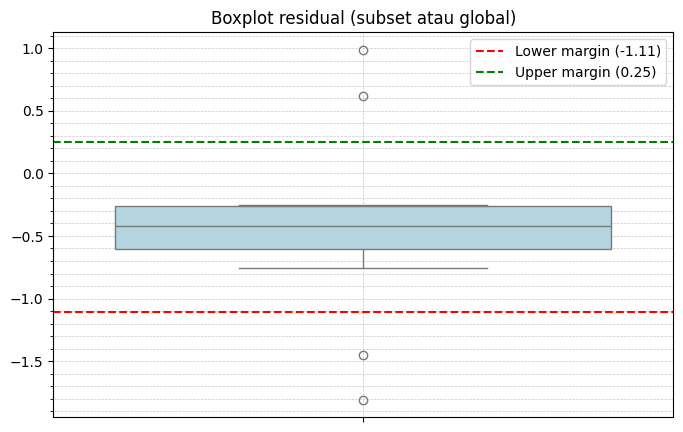

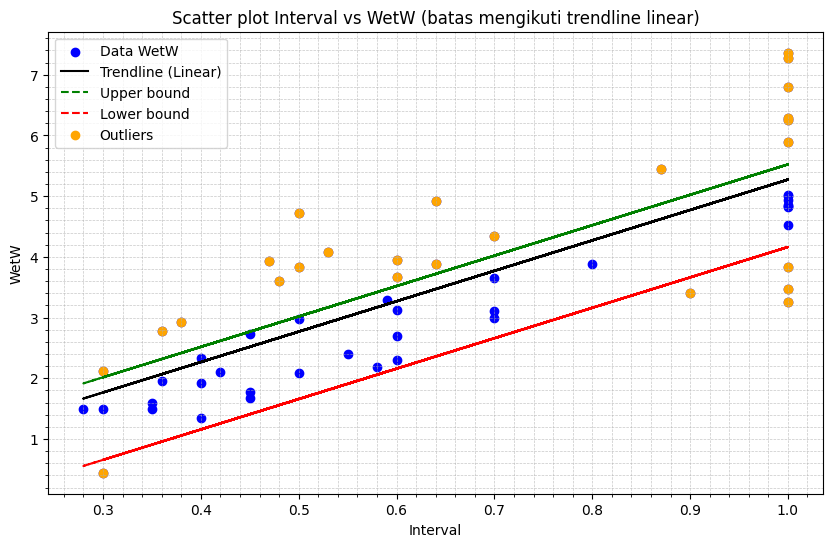


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
       HoleId         Hill        Hill_Group  From    To  Interval  CoreRec  \
26  CS8170214  BATU BERANI  Belambus_Selatan  4.70  5.00       0.3     0.66   
28  CS8170214  BATU BERANI  Belambus_Selatan  6.00  6.60       0.6     1.20   
44  CS8170215  BATU BERANI  Belambus_Selatan  4.65  5.25       0.6     1.00   
88  CS8170220  BATU BERANI  Belambus_Selatan  8.00  8.50       0.5     1.60   
89  CS8170220  BATU BERANI  Belambus_Selatan  8.50  9.00       0.5     1.60   

     WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR       WTF       DTF  
26  2.121  24.000  1.612     ESAP  None     LIM     LIM  3.664330  2.784891  
28  3.944  26.648  2.893     ESAP  None     LIM     LIM  1.873614  1.374332  
44  3.666  40.371  2.186     ESAP  None     LIM     LIM  2.089859  1.246162  
88  4.728  27.030  3.450     ESAP  None     LIM     LIM  2.021451  1.475043  
89  3.826  28.751  2.726     ESAP  None     LIM     LIM  1.635802  1.1

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [103]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-2539338653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.850,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422,3.528235
26,CS8170214,BATU BERANI,Belambus_Selatan,4.70,5.00,0.30,0.660,2.121,24.000,1.612,ESAP,None,LIM,LIM,3.664330,2.784891,3.213636
27,CS8170214,BATU BERANI,Belambus_Selatan,5.00,6.00,1.00,1.000,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853,4.832000
28,CS8170214,BATU BERANI,Belambus_Selatan,6.00,6.60,0.60,1.200,3.944,26.648,2.893,ESAP,None,LIM,LIM,1.873614,1.374332,3.944000
29,CS8170214,BATU BERANI,Belambus_Selatan,6.60,7.00,0.40,1.200,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116,1.928000
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.350,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137,3.296000
44,CS8170215,BATU BERANI,Belambus_Selatan,4.65,5.25,0.60,1.000,3.666,40.371,2.186,ESAP,None,LIM,LIM,2.089859,1.246162,3.666000
88,CS8170220,BATU BERANI,Belambus_Selatan,8.00,8.50,0.50,1.600,4.728,27.030,3.450,ESAP,None,LIM,LIM,2.021451,1.475043,4.728000
89,CS8170220,BATU BERANI,Belambus_Selatan,8.50,9.00,0.50,1.600,3.826,28.751,2.726,ESAP,None,LIM,LIM,1.635802,1.165498,3.826000
90,CS8170220,BATU BERANI,Belambus_Selatan,9.00,9.53,0.53,1.600,4.081,31.855,2.781,ESAP,None,LIM,LIM,1.646063,1.121711,4.081000



Residual IQR acuan:
Q1: -0.644, Q3: -0.304, IQR: 0.340
Lower margin: -1.154, Upper margin: 0.206


/tmp/ipython-input-1675437817.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1675437817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


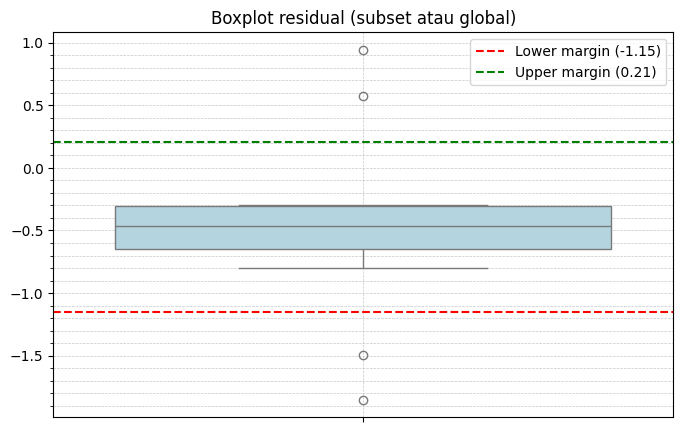

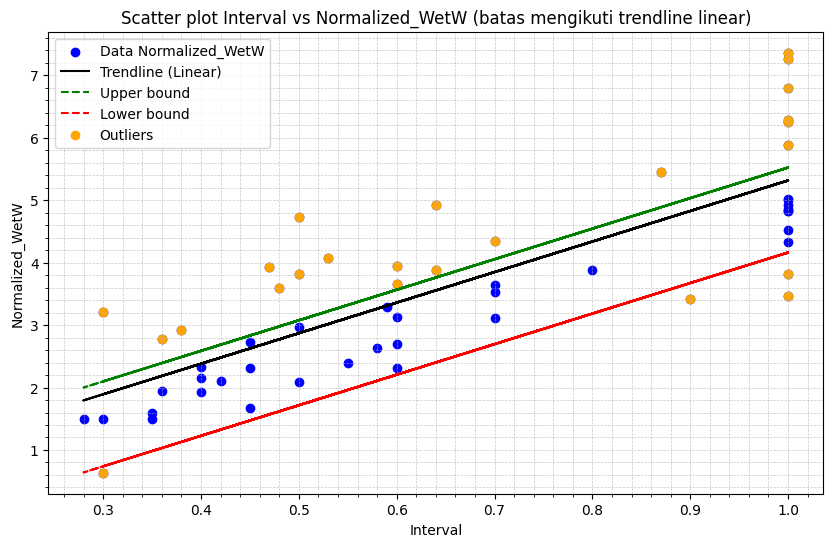

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.85,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422,3.528235,3.848696,Normal
26,CS8170214,BATU BERANI,Belambus_Selatan,4.70,5.00,0.30,0.66,2.121,24.000,1.612,ESAP,None,LIM,LIM,3.664330,2.784891,3.213636,1.891726,Outlier atas
27,CS8170214,BATU BERANI,Belambus_Selatan,5.00,6.00,1.00,1.00,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853,4.832000,5.316424,Normal
28,CS8170214,BATU BERANI,Belambus_Selatan,6.00,6.60,0.60,1.20,3.944,26.648,2.893,ESAP,None,LIM,LIM,1.873614,1.374332,3.944000,3.359454,Outlier atas
29,CS8170214,BATU BERANI,Belambus_Selatan,6.60,7.00,0.40,1.20,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116,1.928000,2.380968,Normal
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.35,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137,3.296000,3.310529,Normal
44,CS8170215,BATU BERANI,Belambus_Selatan,4.65,5.25,0.60,1.00,3.666,40.371,2.186,ESAP,None,LIM,LIM,2.089859,1.246162,3.666000,3.359454,Outlier atas
88,CS8170220,BATU BERANI,Belambus_Selatan,8.00,8.50,0.50,1.60,4.728,27.030,3.450,ESAP,None,LIM,LIM,2.021451,1.475043,4.728000,2.870211,Outlier atas
89,CS8170220,BATU BERANI,Belambus_Selatan,8.50,9.00,0.50,1.60,3.826,28.751,2.726,ESAP,None,LIM,LIM,1.635802,1.165498,3.826000,2.870211,Outlier atas
90,CS8170220,BATU BERANI,Belambus_Selatan,9.00,9.53,0.53,1.60,4.081,31.855,2.781,ESAP,None,LIM,LIM,1.646063,1.121711,4.081000,3.016984,Outlier atas


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=6, width=1.294349
Sturges -> bins=7, width=0.988143


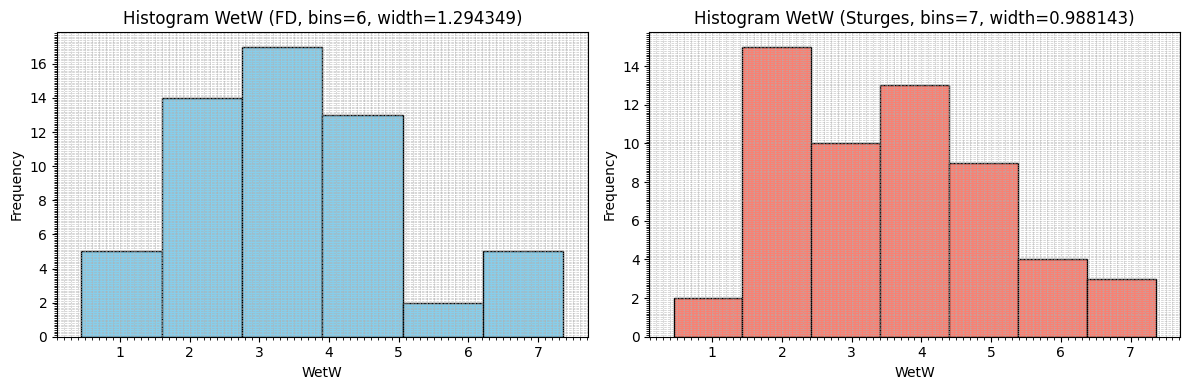


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.445000,1.597833,5
1,1.597833,2.750667,14
2,2.750667,3.903500,17
3,3.903500,5.056333,13
4,5.056333,6.209167,2
5,6.209167,7.362000,5



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.445000,1.433143,2
1,1.433143,2.421286,15
2,2.421286,3.409429,10
3,3.409429,4.397571,13
4,4.397571,5.385714,9
5,5.385714,6.373857,4
6,6.373857,7.362000,3


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [106]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 1.433143
Masukkan batas atas (<=): 5.385714

Filtered rows (Normal only): 31


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.85,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422,3.528235,3.848696
27,CS8170214,BATU BERANI,Belambus_Selatan,5.00,6.00,1.00,1.00,4.832,21.109,3.812,ESAP,None,LIM,LIM,1.652733,1.303853,4.832000,5.316424
29,CS8170214,BATU BERANI,Belambus_Selatan,6.60,7.00,0.40,1.20,1.928,33.973,1.273,ESAP,None,LIM,LIM,1.373857,0.907116,1.928000,2.380968
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.35,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137,3.296000,3.310529
239,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.80,0.80,1.00,3.890,41.517,2.275,ESAP,LIM,LIM,LIM,1.657725,0.969492,3.890000,4.337939
273,CS8230809,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.65,8.00,0.35,1.00,1.495,45.485,0.815,ESAP,Lim,LIM,LIM,1.456217,0.793857,1.495000,2.136347
274,CS8230809,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.50,0.50,1.00,2.095,54.177,0.960,ESAP,Sap,LIM,LIM,1.428456,0.654567,2.095000,2.870211
287,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.00,5.00,1.00,1.00,5.020,36.554,3.185,ESAP,Lim,LIM,LIM,1.711420,1.085831,5.020000,5.316424
288,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.70,0.70,1.00,3.110,42.444,1.790,ESAP,Lim,LIM,LIM,1.514660,0.871782,3.110000,3.848696
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.35,5.80,0.45,1.00,1.675,27.164,1.220,ESAP,Lim,LIM,LIM,1.268981,0.924273,1.675000,2.625590


#Filter By MC


Descriptive statistics for H2O:
Count: 31
Mean: 37.858774
Standard Error: 1.794778
Median: 40.859
Mode: 13.973
Standard Deviation: 9.992898
Sample Variance: 99.858016
Kurtosis: 0.370179
Skewness: -0.892453
Range: 40.204
Minimum: 13.973
Maximum: 54.177
Sum: 1173.622
Confidence Level (95%): ±3.665425

Bin calculation:
Freedman–Diaconis -> bins=8, width=5.656112
Sturges -> bins=6, width=6.700667


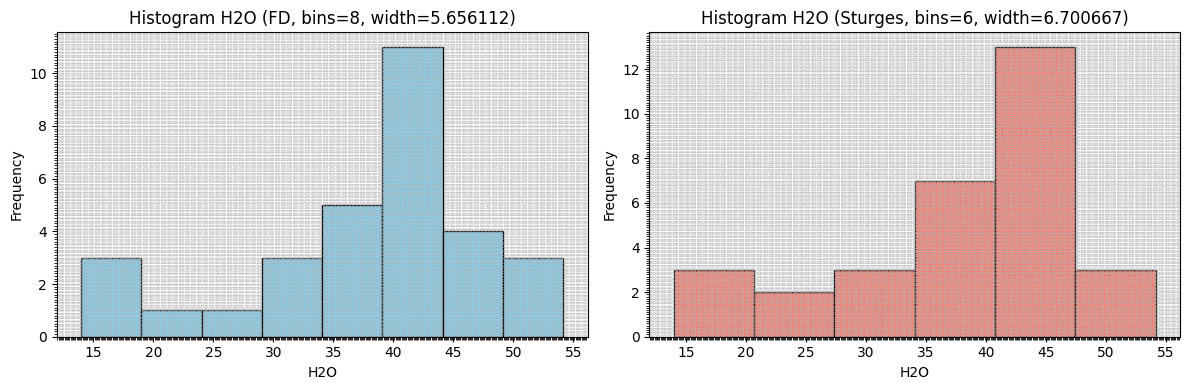


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,13.9730,18.9985,3
1,18.9985,24.0240,1
2,24.0240,29.0495,1
3,29.0495,34.0750,3
4,34.0750,39.1005,5
5,39.1005,44.1260,11
6,44.1260,49.1515,4
7,49.1515,54.1770,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,13.973000,20.673667,3
1,20.673667,27.374333,2
2,27.374333,34.075000,3
3,34.075000,40.775667,7
4,40.775667,47.476333,13
5,47.476333,54.177000,3


In [107]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [108]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 34.0750
is less than or equal to: 49.1515

Filtered rows (H2O): 20


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.85,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422,3.528235,3.848696
30,CS8170214,BATU BERANI,Belambus_Selatan,7.00,7.59,0.59,1.35,3.296,39.442,1.996,ESAP,None,LIM,LIM,1.415393,0.857137,3.296000,3.310529
239,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.80,0.80,1.00,3.890,41.517,2.275,ESAP,LIM,LIM,LIM,1.657725,0.969492,3.890000,4.337939
273,CS8230809,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.65,8.00,0.35,1.00,1.495,45.485,0.815,ESAP,Lim,LIM,LIM,1.456217,0.793857,1.495000,2.136347
287,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.00,5.00,1.00,1.00,5.020,36.554,3.185,ESAP,Lim,LIM,LIM,1.711420,1.085831,5.020000,5.316424
288,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.70,0.70,1.00,3.110,42.444,1.790,ESAP,Lim,LIM,LIM,1.514660,0.871782,3.110000,3.848696
326,CS8230815R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.42,0.42,1.00,2.100,41.429,1.230,ESAP,LIM,LIM,LIM,1.704602,0.998410,2.100000,2.478817
327,CS8230815R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.42,9.00,0.58,0.83,2.190,43.151,1.245,ESAP,LIM,LIM,LIM,1.550926,0.881691,2.638554,3.261605
418,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.28,0.28,1.00,1.500,35.333,0.970,ESAP,Lim,LIM,LIM,1.826359,1.181046,1.500000,1.793877
491,CS8230831,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.00,4.855,35.942,3.110,ESAP,LIM,LIM,LIM,1.655168,1.060262,4.855000,5.316424


# Filter By DTF


Descriptive statistics for DTF:
Count: 20
Mean: 0.992177
Standard Error: 0.026583
Median: 1.0037669265
Mode: 0.793857394
Standard Deviation: 0.118884
Sample Variance: 0.014133
Kurtosis: -0.566111
Skewness: 0.159224
Range: 0.43345587799999996
Minimum: 0.793857394
Maximum: 1.227313272
Sum: 19.843542187999997
Confidence Level (95%): ±0.055640

Bin calculation:
Freedman–Diaconis -> bins=5, width=0.112961
Sturges -> bins=6, width=0.072243


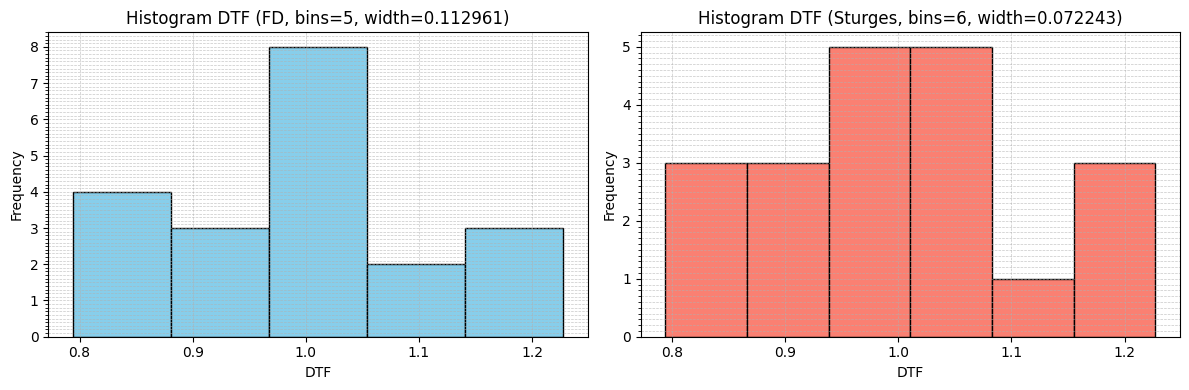


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.793857,0.880549,4
1,0.880549,0.967240,3
2,0.967240,1.053931,8
3,1.053931,1.140622,2
4,1.140622,1.227313,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.793857,0.866100,3
1,0.866100,0.938343,3
2,0.938343,1.010585,5
3,1.010585,1.082828,5
4,1.082828,1.155071,1
5,1.155071,1.227313,3


In [109]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [110]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 0.938343
is less than or equal to: 1.082828

Filtered rows (DTF): 10


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
5,CS8170210,BATU BERANI,Belambus_Selatan,3.60,4.30,0.70,0.85,2.999,41.271,1.761,ESAP,None,LIM,LIM,1.723890,1.012422,3.528235,3.848696
239,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.80,0.80,1.00,3.890,41.517,2.275,ESAP,LIM,LIM,LIM,1.657725,0.969492,3.890000,4.337939
326,CS8230815R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.42,0.42,1.00,2.100,41.429,1.230,ESAP,LIM,LIM,LIM,1.704602,0.998410,2.100000,2.478817
491,CS8230831,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.00,4.855,35.942,3.110,ESAP,LIM,LIM,LIM,1.655168,1.060262,4.855000,5.316424
492,CS8230831,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.35,0.35,1.00,1.600,35.000,1.040,ESAP,LIM,LIM,LIM,1.558493,1.013020,1.600000,2.136347
495,CS8230831,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.00,9.60,0.60,1.00,2.690,36.245,1.715,ESAP,LIM,LIM,LIM,1.528460,0.974464,2.690000,3.359454
513,CS8230832,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.64,8.00,0.36,1.00,1.950,43.590,1.100,ESAP,LIM,LIM,LIM,1.846652,1.041701,1.950000,2.185271
572,CS8230839,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.00,5.005,40.859,2.960,ESAP,Lim,LIM,LIM,1.706306,1.009124,5.005000,5.316424
586,CS8230840,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.60,0.60,1.00,3.130,41.374,1.835,ESAP,Lim,LIM,LIM,1.778468,1.042648,3.130000,3.359454
588,CS8230840,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.00,3.650,45.890,1.975,ESAP,Lim,LIM,LIM,1.777656,0.961882,3.650000,3.848696


# SUMMARY

In [111]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 10
Mean: 0.653000
Standard Error: 0.074864
Median: 0.6499999999999999
Mode: 0.6
Standard Deviation: 0.236739
Sample Variance: 0.056046
Kurtosis: -1.104175
Skewness: 0.185628
Range: 0.65
Minimum: 0.35
Maximum: 1.0
Sum: 6.529999999999999
Confidence Level (95%): ±0.169353

Descriptive statistics for CoreRec:
Count: 10
Mean: 0.985000
Standard Error: 0.015000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.047434
Sample Variance: 0.002250
Kurtosis: 5.111111
Skewness: -2.666667
Range: 0.15000000000000002
Minimum: 0.85
Maximum: 1.0
Sum: 9.85
Confidence Level (95%): ±0.033932

Descriptive statistics for WetW:
Count: 10
Mean: 3.186900
Standard Error: 0.369862
Median: 3.0645
Mode: 1.6
Standard Deviation: 1.169607
Sample Variance: 1.367982
Kurtosis: -1.080283
Skewness: 0.277877
Range: 3.405
Minimum: 1.6
Maximum: 5.005
Sum: 31.869
Confidence Level (95%): ±0.836687

Descriptive statistics for H2O:
Count: 10
Mean: 40.311700
Standard Error: 1.109357
Median: 41

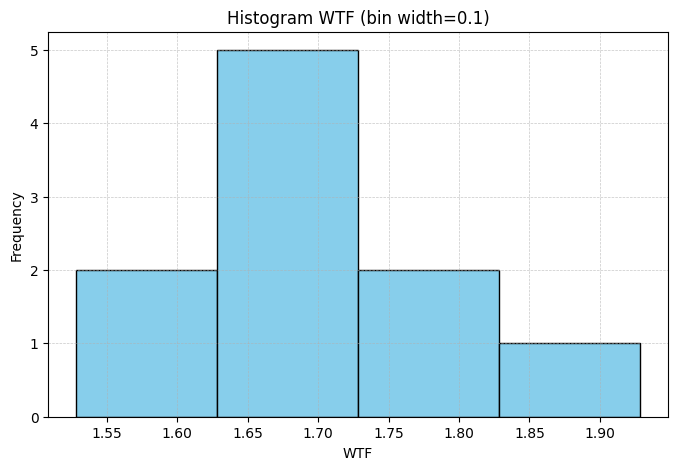


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.52846,1.62846,2
1,1.62846,1.72846,5
2,1.72846,1.82846,2
3,1.82846,1.92846,1


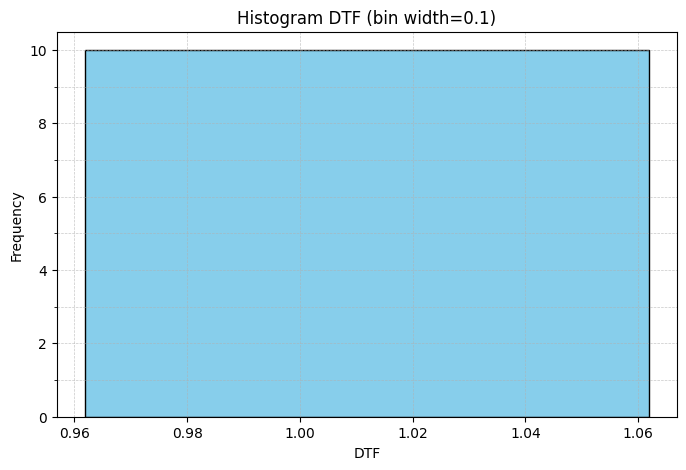


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.961882,1.061882,10


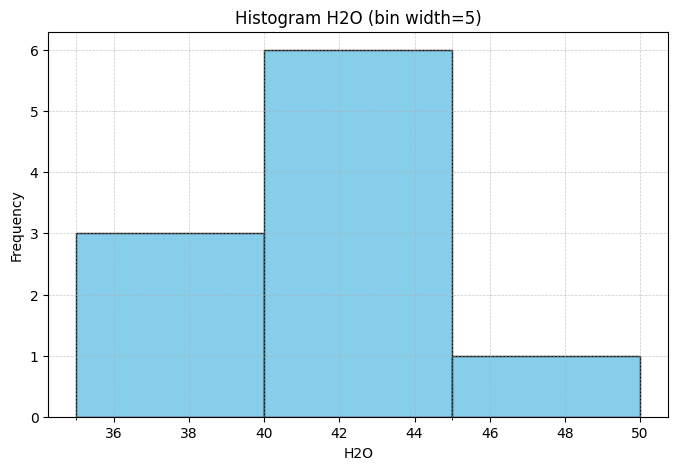


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,35.0,40.0,3
1,40.0,45.0,6
2,45.0,50.0,1


In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [113]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: LIM
Masukkan Material: ESAP

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_lim_esap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,LIM,ESAP,0.653,0.985,3.1869,40.3117,1.9001,1.693742,1.008343
